In [1]:
import sys
import pathlib
pth=str(pathlib.Path().absolute())
sys.path.append(('\\').join(pth.split('\\')[:-1])+"\\Utils")
from Utilities import *
import numpy as np
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage import morphology
from skimage.transform import rotate
import json

In [3]:
#[x, y, w, h]
#Lectura de informacion
f1=open(('\\').join(pth.split('\\')[:-4])+"\\Data_base\\validcrop.txt","r")
lines=f1.readlines()
lines

[' 1366.5100 1.456510e+03\n',
 ' 711.9800 2.399800e+02\n',
 ' 99.0000 1anemia-100.jpg\n',
 ' 501.5100 2.764510e+03\n',
 ' 947.9800 4.919800e+02\n',
 ' 99.0000 1anemia-101.jpg\n',
 ' 1407.5100 1.312510e+03\n',
 ' 1097.9800 5.579800e+02\n',
 ' 99.0000 1anemia-102.jpg\n',
 ' 1490.5100 1.460510e+03\n',
 ' 627.9800 1.999800e+02\n',
 ' 99.0000 1anemia-103.jpg\n',
 ' 2414.5100 1.860510e+03\n',
 ' 827.9800 5.079800e+02\n',
 ' 99.0000 1anemia-104.jpg\n',
 ' 1926.5100 1.492510e+03\n',
 ' 567.9800 3.039800e+02\n',
 ' 99.0000 1anemia-106.jpg\n',
 ' 1718.5100 1.200510e+03\n',
 ' 1019.9800 6.719800e+02\n',
 ' 99.0000 1anemia-107.jpg\n',
 '\n',
 ' 1131.5100 1.570510e+03\n',
 ' 605.9800 3.539800e+02\n',
 ' 99.0000 1anemia-108.jpg\n',
 ' 1251.5100 2.188510e+03\n',
 ' 785.9800 4.799800e+02\n',
 ' 99.0000 1anemia-109.jpg\n',
 ' 951.5100 2.020510e+03\n',
 ' 905.9800 4.619800e+02\n',
 ' 99.0000 1anemia-110.jpg\n',
 ' 1437.5100 1.396510e+03\n',
 ' 779.9800 5.639800e+02\n',
 ' 99.0000 1anemia-111.jpg\n',
 ' 

In [4]:

linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)
xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4).astype(int)+1

In [21]:
name='c1anemia-300'
di=('\\').join(pth.split('\\')[:-4])+'\\Data_base\\Imagenes_Originales\\'+name+'.jpg'
ROI=('\\').join(pth.split('\\')[:-4])+'\\Data_base\\Sem_Auto\\eye_'+name+'.jpg'
#di='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Imagenes_Originales/'+name+'.jpg'
#ROI='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Sem_Auto/eye_'+name+'.jpg'
img = io.imread(di)
ROI = io.imread(ROI)

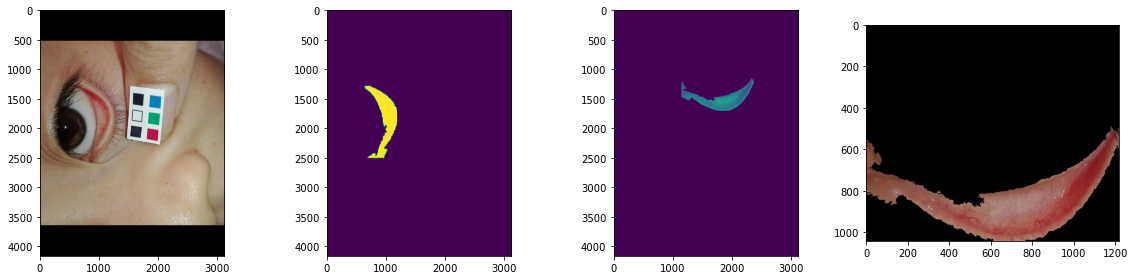

In [22]:
#img=rotate(img,90)
#ROI=rotate(ROI,90)

mr=xywh[np.where(imgnames==(name+".jpg"))][0]
mask=assemble_mask(mr,img,ROI)
lum = np.mean(mask,axis=2).astype(int)

#mask=rotate(mask,90)
img=rotate(img,90)

mask1=lum > 0
mask1=rotate(mask1,90)
fig, (ax0,ax1,ax2,ax3) = plt.subplots(ncols=4, figsize=(16, 4))
ax0.imshow(img)
ax1.imshow(mask1)
ax2.imshow(lum)
ax3.imshow(ROI)
plt.tight_layout()
plt.show()

In [40]:
np.arange(0,360,360/4)
imgs=np.vectorize(pyfunc=(lambda img,ang:rotate(img,ang)),signature="(a,b,c),()->()")(img,np.arange(0,360,360/2))
#rotate(img,np.arange(0,360,360/4)[1])
#(lambda img,ang:rotate(img,ang))(img,np.arange(0,360,360/4)[0])

ValueError: buffer source array is read-only

(-0.5, 3119.5, 4159.5, -0.5)

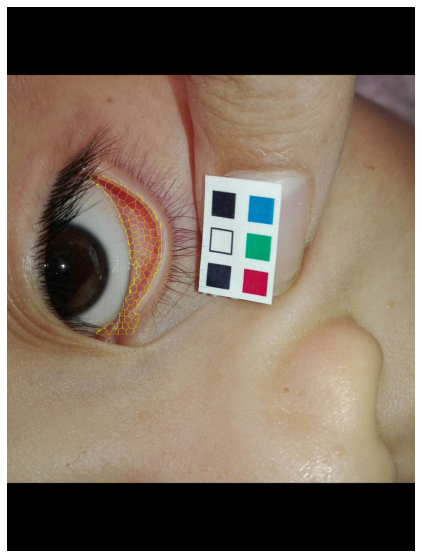

In [23]:
m_slic = slic(img, n_segments=100,sigma=5,mask=mask1)
fig = plt.figure("Superpixels -- %d segments" % (500),figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, m_slic))
plt.axis("off")

In [14]:
SD=get_Statistical_Descriptors(img,mask1,n_segments=30)

In [ ]:
SD

In [16]:
dest='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Metadata/'+name+'.npy'
np.save(dest,SD)
#with open(dest,'w') as out:
#    json.dump(SD,out)

In [ ]:
1=open("/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/validcrop.txt","r")
lines=f1.readlines()
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)
xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4).astype(int)+1

In [ ]:
name='c1anemia-300'
di='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Imagenes_Originales/'+name+'.jpg'
ROI='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Sem_Auto/eye_'+name+'.jpg'
dest='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Metadata/'+name+'.npy'
dir_origin='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Imagenes_Originales/'
dir_ROI='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Sem_Auto/eye_'
dir_meta='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Metadata/'
#FOR
for name in imgnames:
    img = io.imread(dir_origin+name)
    ROI = io.imread(dir_ROI+name)
    mask=assemble_mask(xywh[np.where(imgnames==(name))][0],img,ROI)
    lum = np.mean(mask,axis=2).astype(int)
    mask1=lum > 0
    SD=get_Statistical_Descriptors(img,mask1,n_segments=20)
    name=name-
    np.save(dest,dir_meta+)

In [24]:
imgnames[0].split('.')[0]+'.npy'

'c1anemia-100.npy'